In [ ]:
# download data

In [1]:
# Download data if not present
!if [ ! -f federal_spending_categories.csv ]; \
  then curl -O https://datalab.usaspending.gov/americas-finance-guide/data/federal_spending_categories.csv; \
fi

In [2]:
# Should be:
# MD5 (federal_spending_categories.csv) = a3e2ab62a56ceee6af97835212a1b5d2
!md5 federal_spending_categories.csv

MD5 (federal_spending_categories.csv) = a3e2ab62a56ceee6af97835212a1b5d2


In [ ]:
# load data

In [3]:
import csv

spending = [line for line in csv.DictReader(open('federal_spending_categories.csv'))]

category_spending = [line for line in spending
                     if line['function'] == 'category'
                     and line['child'] == '']

label_amounts = {line['parent_plain']: int(line['federal_spending'])
                 for line in category_spending}

label_amounts = {label: amount
                 for label, amount in label_amounts.items()
                 if amount > 0}

In [ ]:
# make charts

In [4]:
import itertools

import matplotlib
import matplotlib.pyplot as plt

In [5]:
def pareto_processed_data(label_amounts):
    """Ordered labels, amounts, cumulative_amounts, and total"""
    labels, amounts = zip(*sorted(label_amounts.items(),
                                  key=lambda label_amount: label_amount[1],
                                  reverse=True))
    return labels, amounts

In [6]:
def pareto_chart(label_amounts):
    """Make a nice Pareto chart"""
    labels, amounts = pareto_processed_data(label_amounts)
    cumulative_amounts = list(itertools.accumulate(amounts))
    total = cumulative_amounts[-1]
    amount_color, cumulative_color = 'C0', 'C1'
    plt.bar(labels, amounts, color=amount_color)
    plt.xticks(rotation=-45, ha='left')
    plt.plot(labels, cumulative_amounts, 'o-', color=cumulative_color)
    y2 = plt.gca().secondary_yaxis('right')
    y2.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=total))

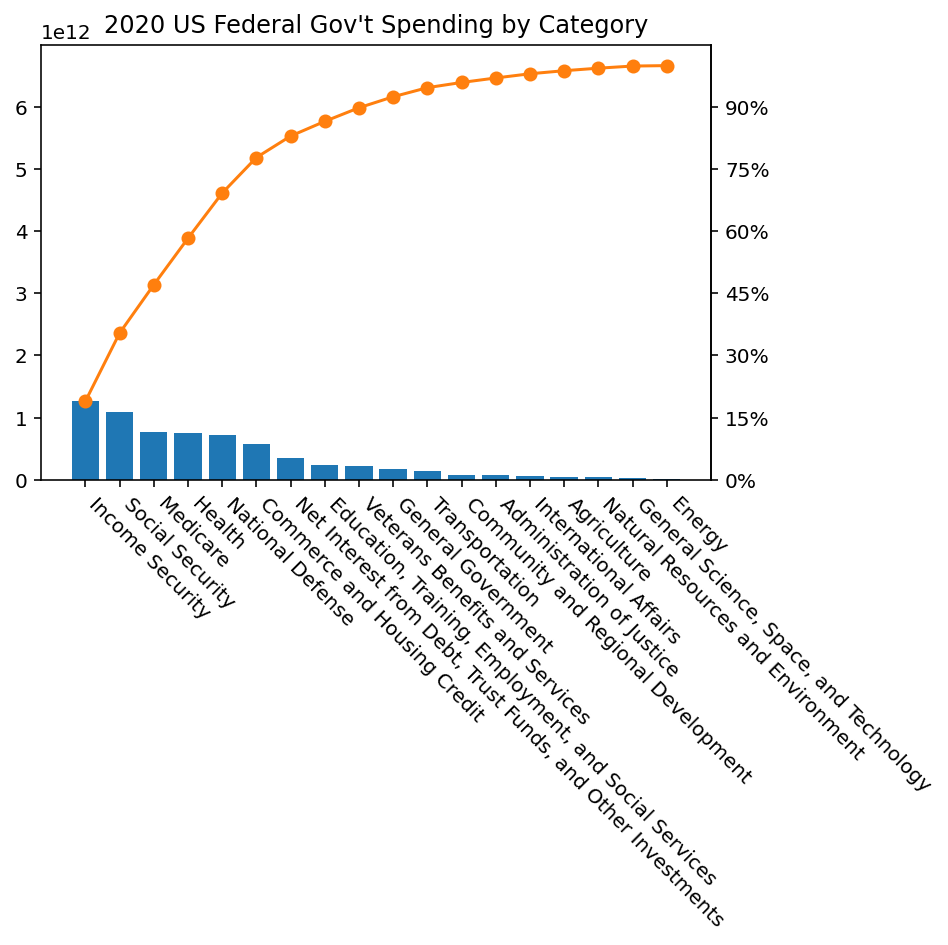

In [7]:
pareto_chart(label_amounts)
_ = plt.title('2020 US Federal Gov\'t Spending by Category')

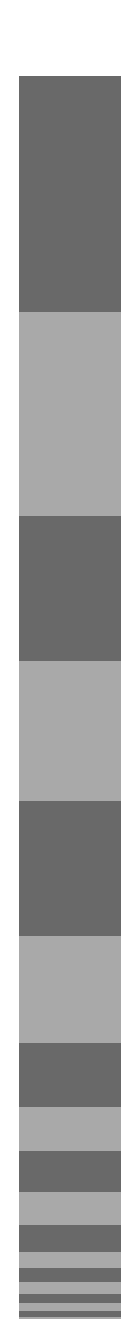

In [8]:
labels, amounts = pareto_processed_data(label_amounts)
cumulative_amounts = list(itertools.accumulate(reversed(amounts)))
plt.figure(figsize=(1, 12))
for index, amount in enumerate(reversed(cumulative_amounts)):
    plt.bar([''], [amount], color='dimgrey' if index % 2 == 0 else 'darkgrey')
_ = plt.gca().axis('off')

In [9]:
total = sum(amounts)

In [10]:
for label, amount in zip(labels, amounts):
    print('{} ({:e}) {}'.format(amount/total, amount, label))

0.18962358752899275 (1.262558e+12) Income Security
0.1645807335647442 (1.095817e+12) Social Security
0.11658106297276384 (7.762240e+11) Medicare
0.11238605745921822 (7.482927e+11) Health
0.10906066886349482 (7.261515e+11) National Defense
0.08585711168742104 (5.716568e+11) Commerce and Housing Credit
0.0517711869357827 (3.447047e+11) Net Interest from Debt, Trust Funds, and Other Investments
0.035553373768693594 (2.367227e+11) Education, Training, Employment, and Social Services
0.03284264154914512 (2.186740e+11) Veterans Benefits and Services
0.026557313874994364 (1.768248e+11) General Government
0.021951198688934245 (1.461562e+11) Transportation
0.01255875838036436 (8.361915e+10) Community and Regional Development
0.01082905022761595 (7.210235e+10) Administration of Justice
0.01016190422926621 (6.766034e+10) International Affairs
0.0073822400931130615 (4.915268e+10) Agriculture
0.006111323100740893 (4.069062e+10) Natural Resources and Environment
0.005115254506969117 (3.405856e+10) G

In [ ]:
"""
19% ($1.3T) Income Security
16% ($1.1T) Social Security
12% ($776B) Medicare
11% ($748B) Health
11% ($726B) National Defense
 9% ($572B) Commerce and Housing Credit
 5% ($345B) Net Interest from Debt, Trust Funds, and Other Investments
 4% ($237B) Education, Training, Employment, and Social Services
 3% ($219B) Veterans Benefits and Services
 3% ($177B) General Government
 2% ($146B) Transportation
 1% ($84B) Community and Regional Development
 1% ($72B) Administration of Justice
 1% ($68B) International Affairs
 1% ($49B) Agriculture
 1% ($41B) Natural Resources and Environment
 1% ($34B) General Science, Space, and Technology
 0% ($7B) Energy
"""

In [ ]:
"""
$1.3T
$1.1T
$776B
$748B
$726B
$572B
$345B
$237B
$219B
$177B
$146B
$84B
$72B
$68B
$49B
$41B
$34B
$7B
"""

In [11]:
for label in labels:
    print(label)

Income Security
Social Security
Medicare
Health
National Defense
Commerce and Housing Credit
Net Interest from Debt, Trust Funds, and Other Investments
Education, Training, Employment, and Social Services
Veterans Benefits and Services
General Government
Transportation
Community and Regional Development
Administration of Justice
International Affairs
Agriculture
Natural Resources and Environment
General Science, Space, and Technology
Energy


In [12]:
for amount in amounts:
    print(amount)

1262558242934
1095817057878
776224012763
748292683864
726151468010
571656751610
344704683969
236722686775
218673996985
176824813727
146156220374
83619153718
72102351855
67660337597
49152682967
40690620068
34058562158
7167805888
